# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [1]:
import pandas as pd

df = pd.read_csv("House_Rent_Dataset.csv")

pd.set_option('display.max_columns', None)  # показати всі колонки
pd.set_option('display.width', 1000)       # дозволити широкий рядок
pd.set_option('display.max_rows', 100)     # максимум рядків при виводі

# --- 1. Розмір датасету ---
print("Розмір датасету:", df.shape, "\n")

# --- 2. Перші 5 рядків ---
print("Перші 5 рядків:")
print(df.head(), "\n")

# --- 3. Інформація про датасет ---
df.info()

Розмір датасету: (4746, 12) 

Перші 5 рядків:
    Posted On  BHK   Rent  Size            Floor    Area Type             Area Locality     City Furnishing Status  Tenant Preferred  Bathroom Point of Contact
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area                    Bandel  Kolkata       Unfurnished  Bachelors/Family         2    Contact Owner
1  2022-05-13    2  20000   800       1 out of 3   Super Area  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family         1    Contact Owner
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family         1    Contact Owner
3  2022-07-04    2  10000   800       1 out of 2   Super Area               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family         1    Contact Owner
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area             South Dum Dum  Kolkata       Unfurnished         Bachelors         1    Contact 

## Завдання 2: Дослідницький аналіз даних (EDA) (5 балів)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


Пропущені значення у кожній колонці:

                   Кількість  Відсоток
Posted On                  0       0.0
BHK                        0       0.0
Rent                       0       0.0
Size                       0       0.0
Floor                      0       0.0
Area Type                  0       0.0
Area Locality              0       0.0
City                       0       0.0
Furnishing Status          0       0.0
Tenant Preferred           0       0.0
Bathroom                   0       0.0
Point of Contact           0       0.0

Базова статистика:

               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3

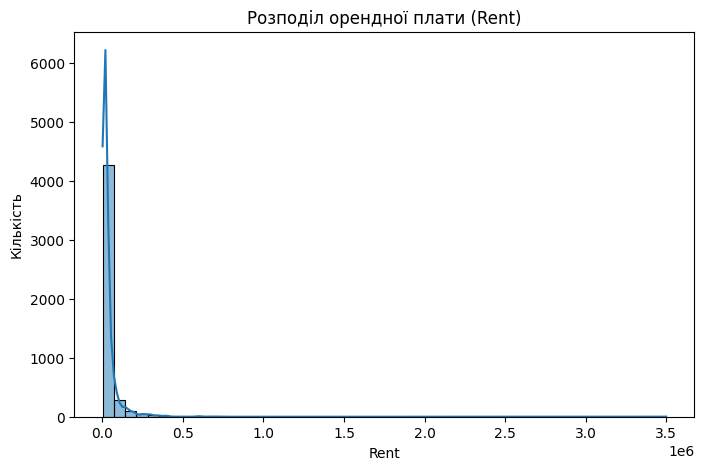


Межі для виявлення викидів: -24500.0 – 67500.0
Кількість викидів: 520
Розмір датасету після видалення викидів: (4226, 12)

Кількість унікальних значень у категоріальних змінних:

Posted On: 81
Floor: 480
Area Type: 3
Area Locality: 2235
City: 6
Furnishing Status: 3
Tenant Preferred: 3
Point of Contact: 3


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Аналіз пропущених значень ---
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
print("Пропущені значення у кожній колонці:\n")
print(pd.DataFrame({"Кількість": missing, "Відсоток": missing_percent}))

# --- 2. Базова статистика для числових змінних ---
print("\nБазова статистика:\n")
print(df.describe())

# --- 3. Аналіз цільової змінної (Rent) ---
plt.figure(figsize=(8,5))
sns.histplot(df['Rent'], bins=50, kde=True)
plt.title("Розподіл орендної плати (Rent)")
plt.xlabel("Rent")
plt.ylabel("Кількість")
plt.show()

# --- 4. Робота з викидами ---
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nМежі для виявлення викидів: {lower_bound} – {upper_bound}")

# Кількість викидів
outliers = df[(df['Rent'] < lower_bound) | (df['Rent'] > upper_bound)]
print("Кількість викидів:", len(outliers))

# Видалення викидів
df_clean = df[(df['Rent'] >= lower_bound) & (df['Rent'] <= upper_bound)]
print("Розмір датасету після видалення викидів:", df_clean.shape)

# --- 5. Аналіз категоріальних змінних ---
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nКількість унікальних значень у категоріальних змінних:\n")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()}")


## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


Матриця кореляцій:

               BHK      Rent      Size  Bathroom
BHK       1.000000  0.401268  0.698453  0.747918
Rent      0.401268  1.000000  0.393605  0.506528
Size      0.698453  0.393605  1.000000  0.680607
Bathroom  0.747918  0.506528  0.680607  1.000000


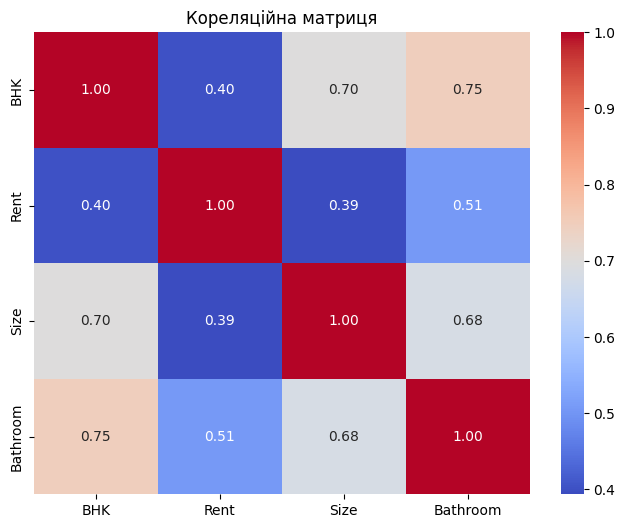

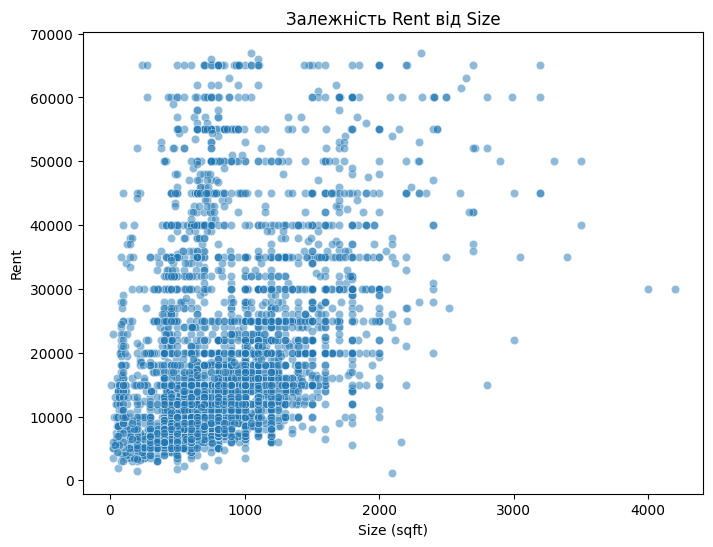

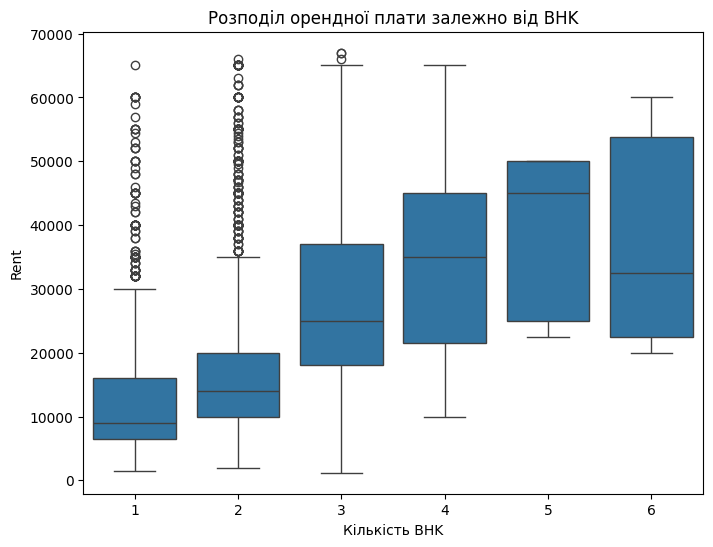

In [12]:

# --- 1. Матриця кореляцій для числових змінних ---
corr_matrix = df_clean.corr(numeric_only=True)
print("Матриця кореляцій:\n")
print(corr_matrix)

# --- 2. Візуалізація heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()

# --- 3. Scatter plot: Size vs Rent ---
plt.figure(figsize=(8,6))
sns.scatterplot(x="Size", y="Rent", data=df_clean, alpha=0.5)
plt.title("Залежність Rent від Size")
plt.xlabel("Size (sqft)")
plt.ylabel("Rent")
plt.show()

# --- 4. Boxplot: BHK vs Rent ---
plt.figure(figsize=(8,6))
sns.boxplot(x="BHK", y="Rent", data=df_clean)
plt.title("Розподіл орендної плати залежно від BHK")
plt.xlabel("Кількість BHK")
plt.ylabel("Rent")
plt.show()


## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


In [4]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- 1. One-Hot Encoding для категоріальних змінних ---
# Вибираємо тільки ті колонки, де небагато унікальних значень
categorical_cols = ["City", "Area Type", "Furnishing Status", "Tenant Preferred"]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# --- 2. Опціонально: створимо нові ознаки ---
df_encoded["Rent_per_sqft"] = df_encoded["Rent"] / df_encoded["Size"]

# Співвідношення ванних кімнат до BHK (зручність житла)
df_encoded["Bath_per_BHK"] = df_encoded["Bathroom"] / df_encoded["BHK"]

# --- 3. Виключення непотрібних колонок ---
df_encoded = df_encoded.drop(["Area Locality", "Point of Contact", "Floor"], axis=1)

# --- 4. Поділ на X (ознаки) та y (ціль) ---
X = df_encoded.drop("Rent", axis=1)
y = df_encoded["Rent"]

# --- 5. Стандартизація числових ознак ---
scaler = StandardScaler()
X_scaled = X.copy()

# Вибираємо числові колонки для стандартизації
numeric_cols = ["Size", "BHK", "Bathroom", "Rent_per_sqft", "Bath_per_BHK"]

X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print("Фінальна форма X:", X_scaled.shape)
print("Фінальна форма y:", y.shape)

Фінальна форма X: (4226, 17)
Фінальна форма y: (4226,)


## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

In [15]:
from sklearn.linear_model import LinearRegression

# 1. Видаляємо текстові колонки, які не закодовані ---
if 'Posted On' in X.columns:
    X = X.drop(columns=['Posted On'])

# 2. Розділяємо дані на навчальну та тестову вибірки ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Стандартизація числових ознак ---
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 4. Навчання моделі ---
lr = LinearRegression()
lr.fit(X_train, y_train)

# 5. Коефіцієнти моделі ---
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Коефіцієнти моделі (за абсолютним значенням):")
print(coef_df.head(10))  

# 6. Прогнози на тренувальній та тестовій вибірках
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(f"\nФорма прогнозів: y_train_pred={y_train_pred.shape}, y_test_pred={y_test_pred.shape}")

Коефіцієнти моделі (за абсолютним значенням):
                             Feature   Coefficient
7                        City_Mumbai  19572.354089
1                               Size   7002.658442
9               Area Type_Super Area  -4368.030000
14                     Rent_per_sqft   4259.940874
11     Furnishing Status_Unfurnished  -3911.178569
5                     City_Hyderabad  -3440.057265
2                           Bathroom   3404.122517
10  Furnishing Status_Semi-Furnished  -2968.380798
6                       City_Kolkata  -2582.767110
13           Tenant Preferred_Family  -2185.029266

Форма прогнозів: y_train_pred=(3380,), y_test_pred=(846,)


## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


Метрики для навчальної вибірки:
MAE: 5358.98, RMSE: 7489.92, R²: 0.71

Метрики для тестової вибірки:
MAE: 5434.14, RMSE: 9030.12, R²: 0.57

Можливе перенавчання: модель добре працює на тренувальних даних, але гірше на тестових.


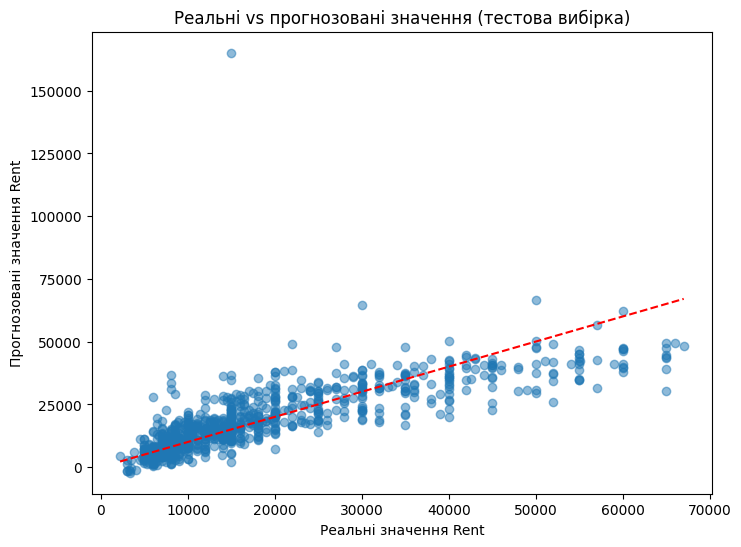

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- 1. Обчислення метрик ---
# Навчальна вибірка
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Тестова вибірка
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Метрики для навчальної вибірки:")
print(f"MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}")

print("\nМетрики для тестової вибірки:")
print(f"MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")

# --- 2. Висновки про якість моделі ---
if r2_train > r2_test + 0.1:
    print("\nМожливе перенавчання: модель добре працює на тренувальних даних, але гірше на тестових.")
elif r2_train < 0.5 and r2_test < 0.5:
    print("\nМожливе недонавчання: модель погано працює навіть на тренувальних даних.")
else:
    print("\nМодель працює стабільно, ознак явного перенавчання або недонавчання немає.")

# --- 3. Графік реальні vs прогнозовані значення ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ідеальна лінія
plt.xlabel("Реальні значення Rent")
plt.ylabel("Прогнозовані значення Rent")
plt.title("Реальні vs прогнозовані значення (тестова вибірка)")
plt.show()

## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)

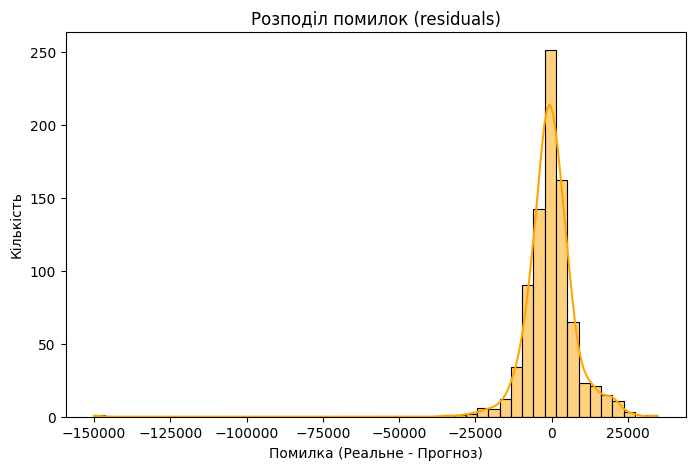

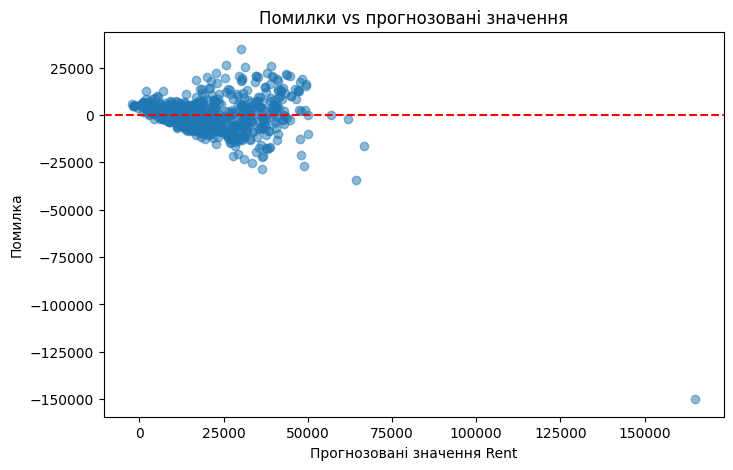

5 прогнозів з найбільшими помилками:
   Реальне        Прогноз        Помилка
0    15000  165058.757299 -150058.757299
1    65000   30303.583177   34696.416823
2    30000   64469.232644  -34469.232644
3     8000   36567.422612  -28567.422612
4    22000   48858.879327  -26858.879327

Помилки по BHK та City для топ-5 прогнозів:
      BHK       City       Residual
4653    3  Hyderabad -150058.757299
3520    3    Chennai   34696.416823
275     4    Kolkata  -34469.232644
852     2     Mumbai  -28567.422612
4071    3  Hyderabad  -26858.879327


In [17]:
# --- 1. Обчислюємо помилки (residuals) ---
residuals = y_test.values - y_test_pred

# --- 2. Гістограма розподілу помилок ---
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True, color='orange')
plt.title("Розподіл помилок (residuals)")
plt.xlabel("Помилка (Реальне - Прогноз)")
plt.ylabel("Кількість")
plt.show()

# --- 3. Scatter plot помилок відносно прогнозованих значень ---
plt.figure(figsize=(8,5))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Помилки vs прогнозовані значення")
plt.xlabel("Прогнозовані значення Rent")
plt.ylabel("Помилка")
plt.show()

# --- 4. Топ-5 прогнозів з найбільшими помилками ---
abs_errors = np.abs(residuals)
top5_idx = abs_errors.argsort()[::-1][:5]

top5_errors = pd.DataFrame({
    "Реальне": y_test.values[top5_idx],
    "Прогноз": y_test_pred[top5_idx],
    "Помилка": residuals[top5_idx]
})
print("5 прогнозів з найбільшими помилками:")
print(top5_errors)

# --- 5. Аналіз помилок по BHK та City ---
residuals_df = pd.DataFrame({
    "BHK": df_clean.loc[y_test.index[top5_idx], "BHK"],
    "City": df_clean.loc[y_test.index[top5_idx], "City"],
    "Residual": residuals[top5_idx]
})
print("\nПомилки по BHK та City для топ-5 прогнозів:")
print(residuals_df)


In [18]:
next_steps = [
    "1. Додати додаткові ознаки (наприклад, Floor, Age будівлі, близкість до центру, зручності).",
    "2. Виконати лог-трансформацію цільової змінної Rent для зменшення впливу викидів.",
    "3. Перевірити взаємодії між ознаками (BHK * Size, Furnishing Status * City).",
    "4. Додатково обробити категоріальні змінні з великою кількістю рівнів."
]

# Виведення кроків
print("\nНаступні кроки для поліпшення моделі:")
for step in next_steps:
    print(step)


Наступні кроки для поліпшення моделі:
1. Додати додаткові ознаки (наприклад, Floor, Age будівлі, близкість до центру, зручності).
2. Виконати лог-трансформацію цільової змінної Rent для зменшення впливу викидів.
3. Перевірити взаємодії між ознаками (BHK * Size, Furnishing Status * City).
4. Додатково обробити категоріальні змінні з великою кількістю рівнів.
